# Analyze Final Models: LCIA QSAR Study
**Date:** June 2, 2023 <br>

In [12]:
from joblib import load
import pandas as pd 
import plot

import os.path
from config_management import UnifiedConfiguration
from data_management import DataManager
from metrics_management import MetricsManager
from results_management import ResultsManager
from results_analysis import ResultsAnalyzer

config_mapping_path = 'Input\configuration-mapping.json'
config = UnifiedConfiguration(config_mapping_path)

data_manager = DataManager(config.data, config.path)
metrics_manager = MetricsManager(config.category_to_dict('metric'))
results_manager = ResultsManager(
    output_dir='Results',
    results_file_type=config.data.file_type
)
results_analyzer = ResultsAnalyzer(
    results_manager, 
    data_manager, 
    config.path.seem3_exposure_file
)

In [16]:
X = data_manager.load_features(
    features_source='opera', 
    ld50_type='predicted', 
    data_condition='missing'
)



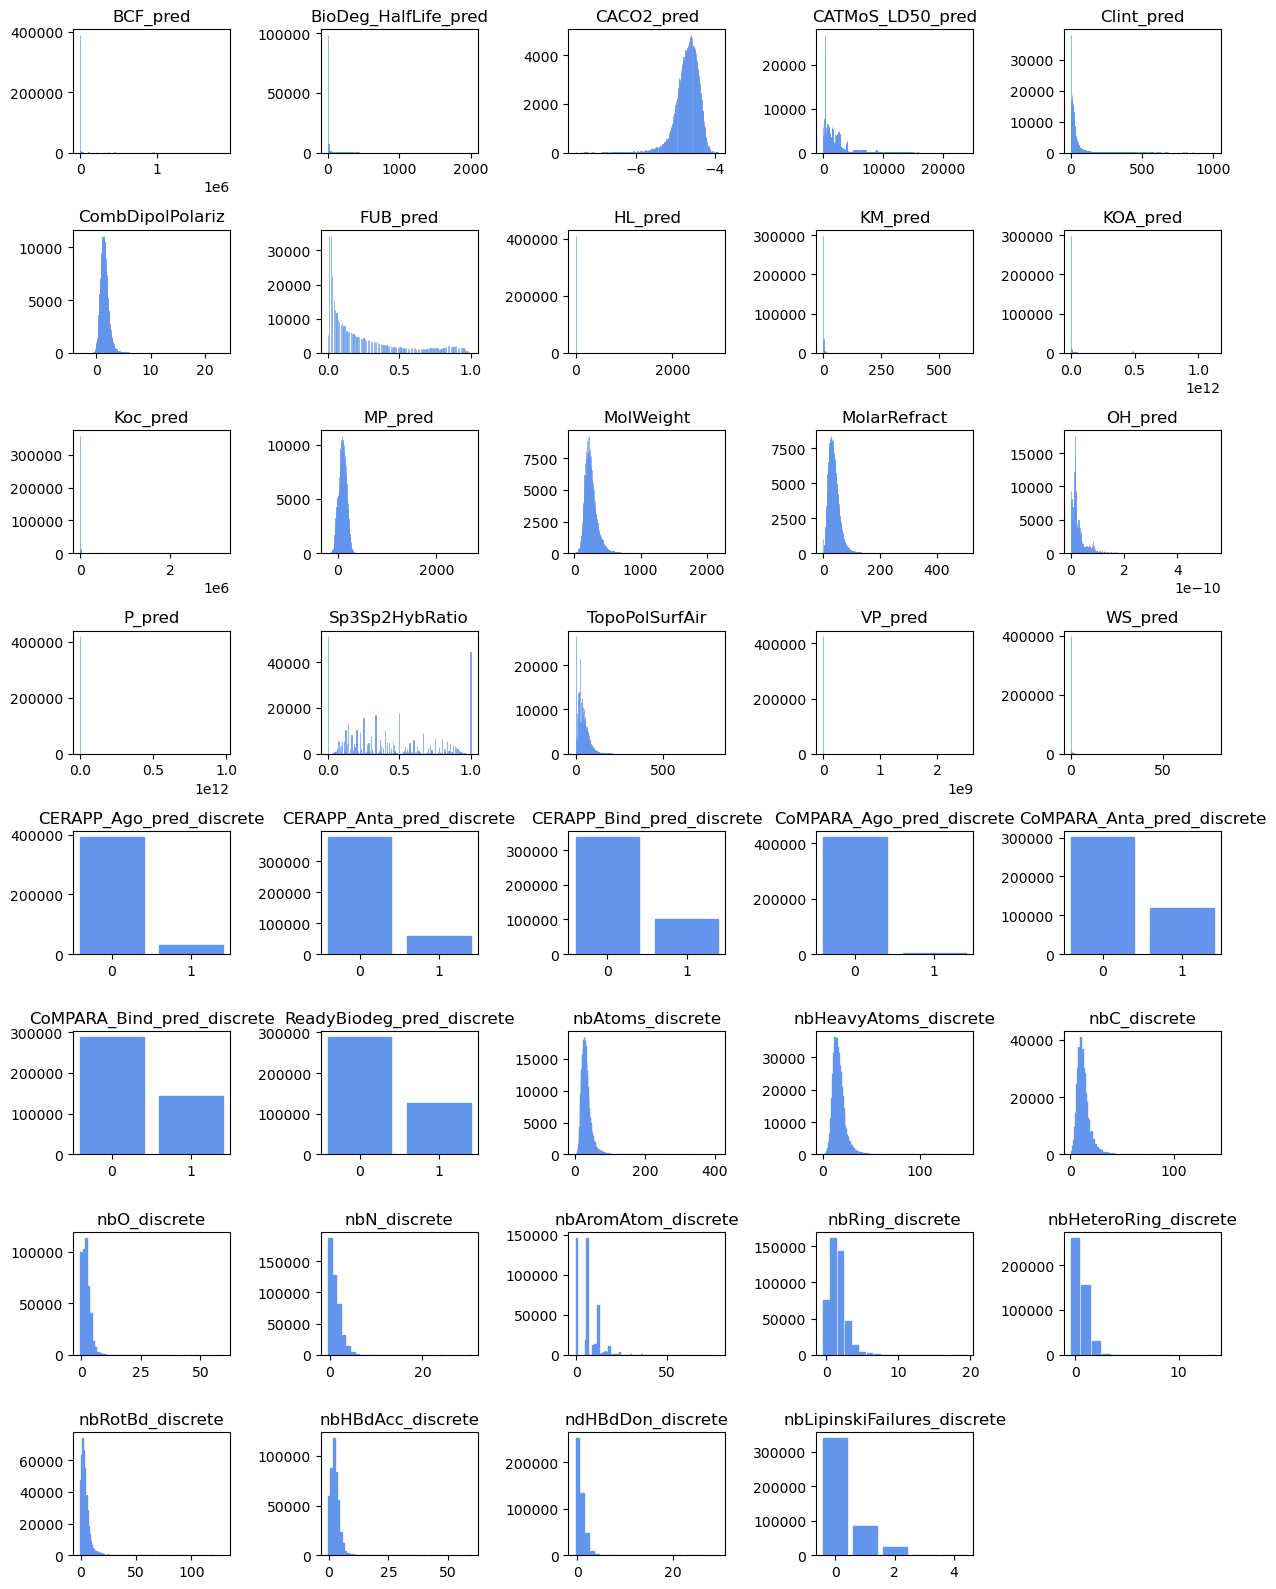

In [17]:
import matplotlib.pyplot as plt 
import numpy as np

color = 'cornflowerblue'

discrete_features = [name for name in df if 'discrete' in name]
continuous_features = list(df.columns.difference(set(discrete_features)))

# Determine the number of columns and calculate the number of rows
ncols = 5
n_features = len(continuous_features) + len(discrete_features)
nrows = (n_features + ncols - 1) // ncols

# Determine the size of each subplot and calculate the total figure size
subplot_width = 2.5 
subplot_height = 2  
figsize = (ncols * subplot_width, nrows * subplot_height)

# Set up the subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# Plot continuous features
for i, feature in enumerate(continuous_features):
    row = i // 5
    col = i % 5
    number_of_bins = int(np.sqrt(len(df[feature].dropna()))) # Square root rule
    axs[row, col].hist(
        df[feature].dropna(), 
        color=color, 
        bins=number_of_bins, 
        edgecolor=color, 
        linewidth=0.5
    )
    axs[row, col].set_title(feature)

# Plot discrete features
for i, feature in enumerate(discrete_features):
    non_null_values = df[feature].dropna()
    unique_values = non_null_values.unique()
    if len(unique_values) > 0: # Check if there are any non-null values
        row = (i + len(continuous_features)) // 5
        col = (i + len(continuous_features)) % 5
        value_counts = non_null_values.value_counts().sort_index()
        axs[row, col].bar(
            value_counts.index, 
            value_counts.values, 
            color=color, 
            edgecolor=color
        )
        axs[row, col].set_title(feature)
        
        # If there are one or two unique values, set the x-axis ticks and labels
        if len(unique_values) <= 2:
            axs[row, col].set_xticks(unique_values)
            integer_labels = [int(value) for value in unique_values] # Convert to integers
            axs[row, col].set_xticklabels(integer_labels)

# Remove unused subplots
total_features = len(continuous_features) + len(discrete_features)
for i in range(total_features, nrows * ncols):
    axs.flatten()[i].axis('off')

plt.tight_layout()

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:327: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\General-Toxicity-Reproductive-Developmental-Toxicity.png"


C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:327: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\All-Chemicals.png"


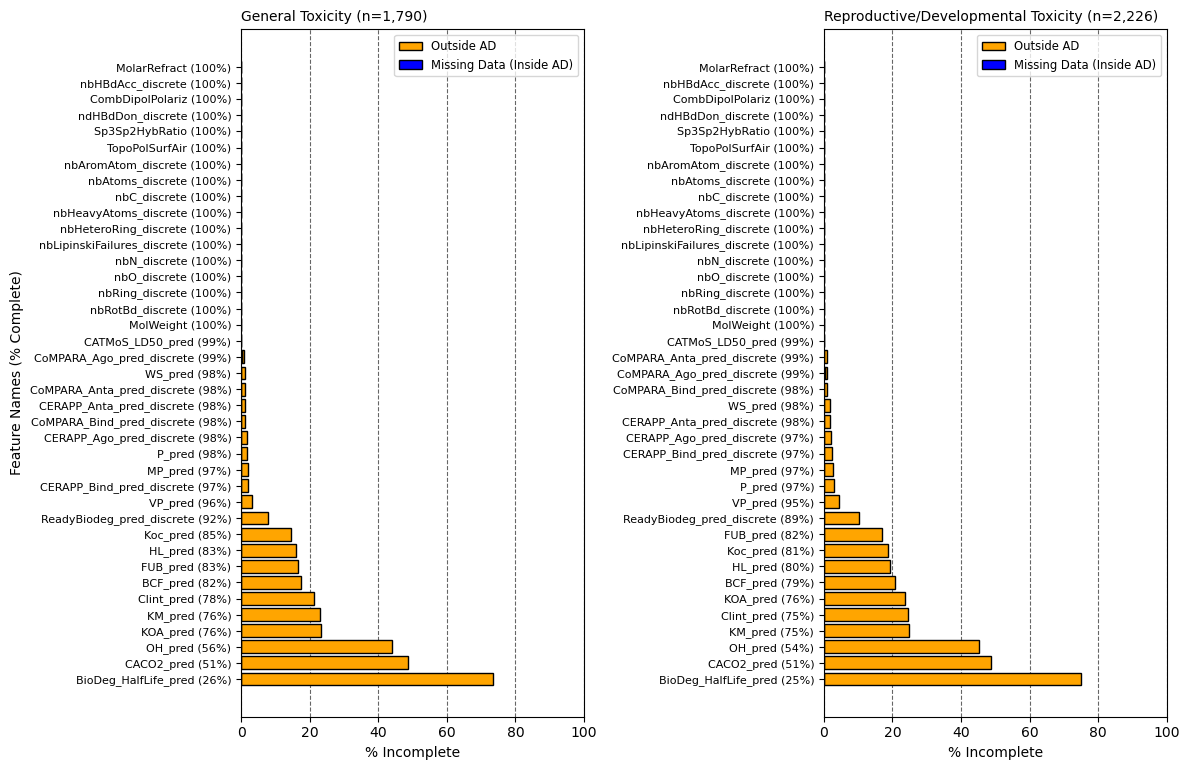

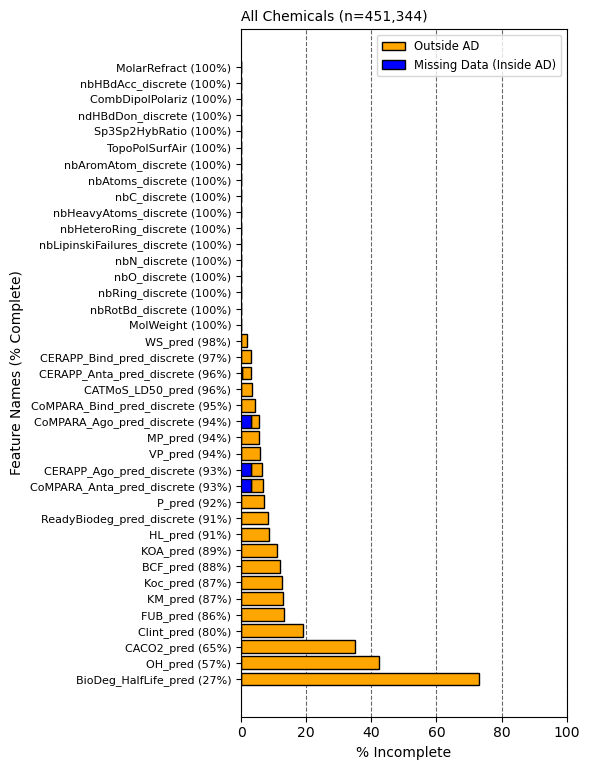

In [2]:
plot.proportions_incomplete_subplots(
    config.path.file_for_features_source['opera'], 
    config.path.opera_AD_file, 
    config.path.surrogate_pods_file,
    config.plot
)

Saving figure --> "Figures\pairwise_scatters_and_kde_subplots\all-opera-features-and-target-union.png"


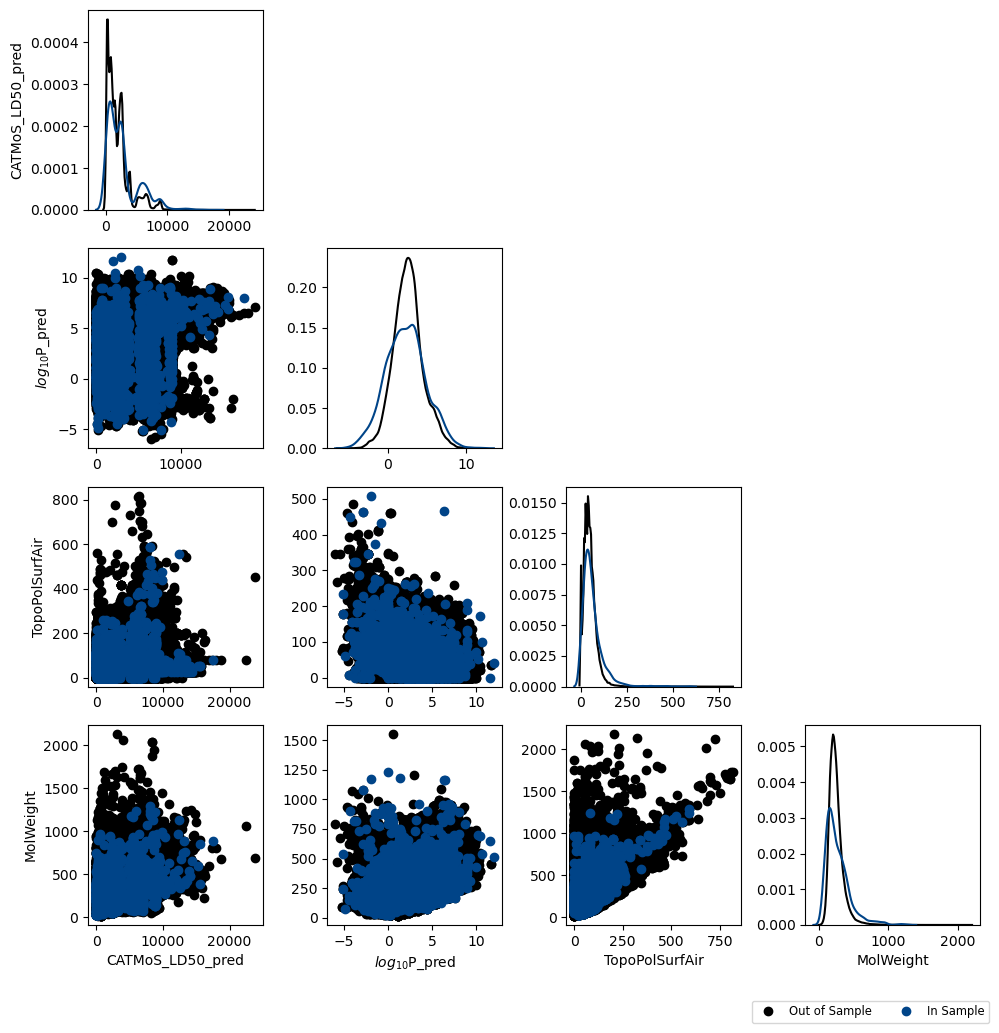

In [3]:
plot.pairwise_scatters_and_kde_subplots(
    config.path.file_for_features_source['opera'], 
    config.path.surrogate_pods_file,
    config.plot
)

## Feature importances

Saving figure --> "Figures\important_feature_counts\opera-predicted-missing-true-RandomForestRegressor.png"


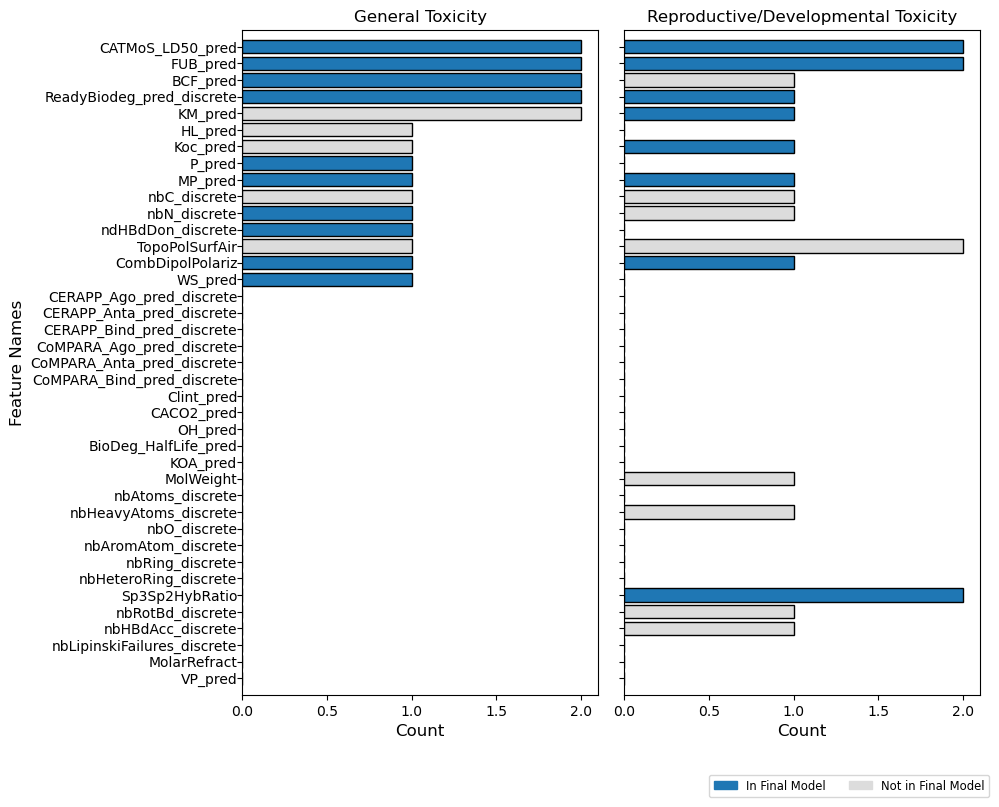

In [4]:
plot.important_feature_counts(results_analyzer, config.plot)

## Feature importances

Saving figure --> "Figures\importances_boxplots\general-opera-predicted-missing-true-RandomForestRegressor.png"
Saving figure --> "Figures\importances_boxplots\repro_dev-opera-predicted-missing-true-RandomForestRegressor.png"


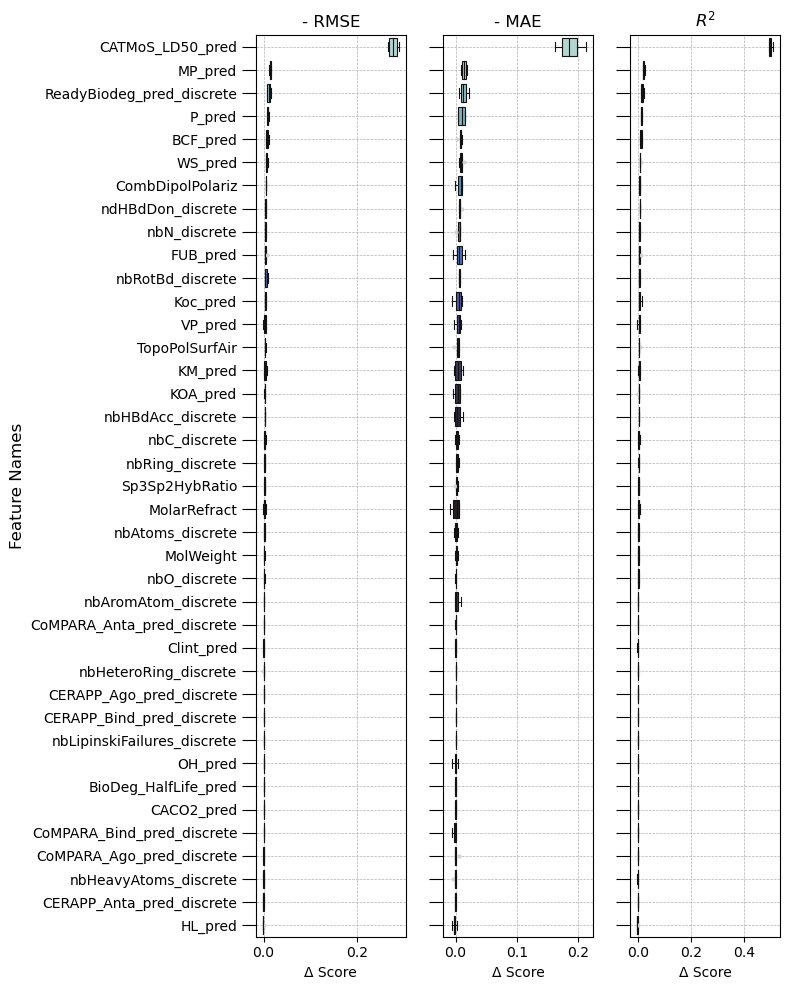

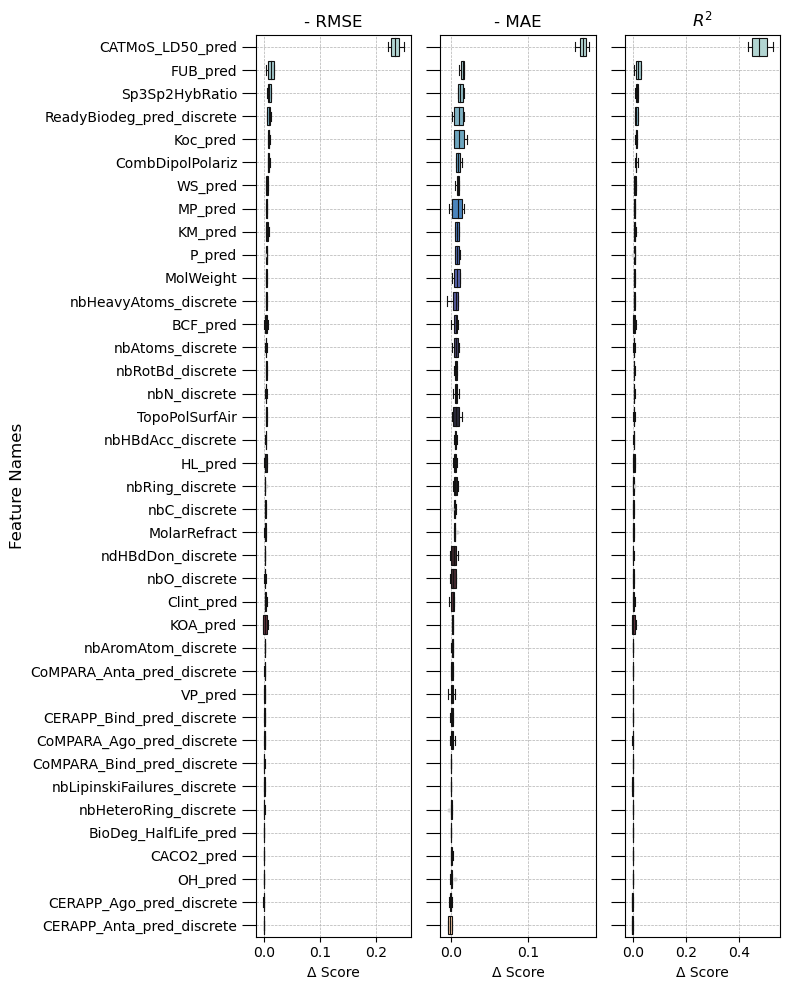

In [5]:
plot.importances_boxplots(results_analyzer, config.plot)

Saving figure --> "Figures\importances_replicates_boxplots\general-opera-predicted-missing-true-RandomForestRegressor.png"
Saving figure --> "Figures\importances_replicates_boxplots\repro_dev-opera-predicted-missing-true-RandomForestRegressor.png"


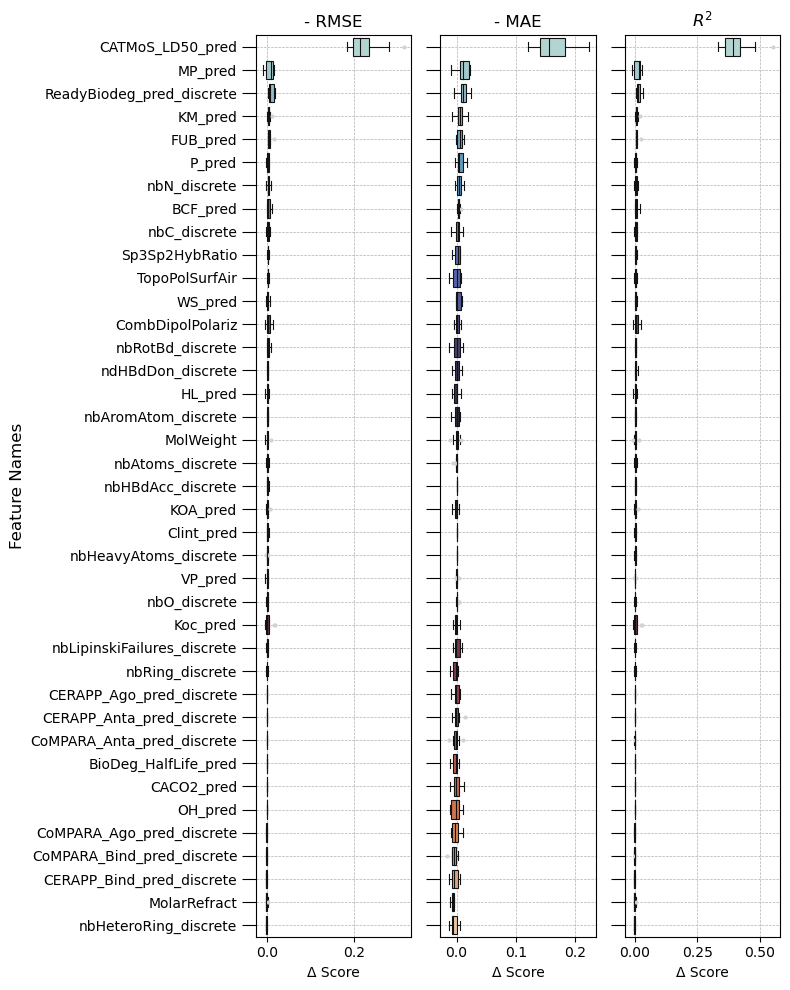

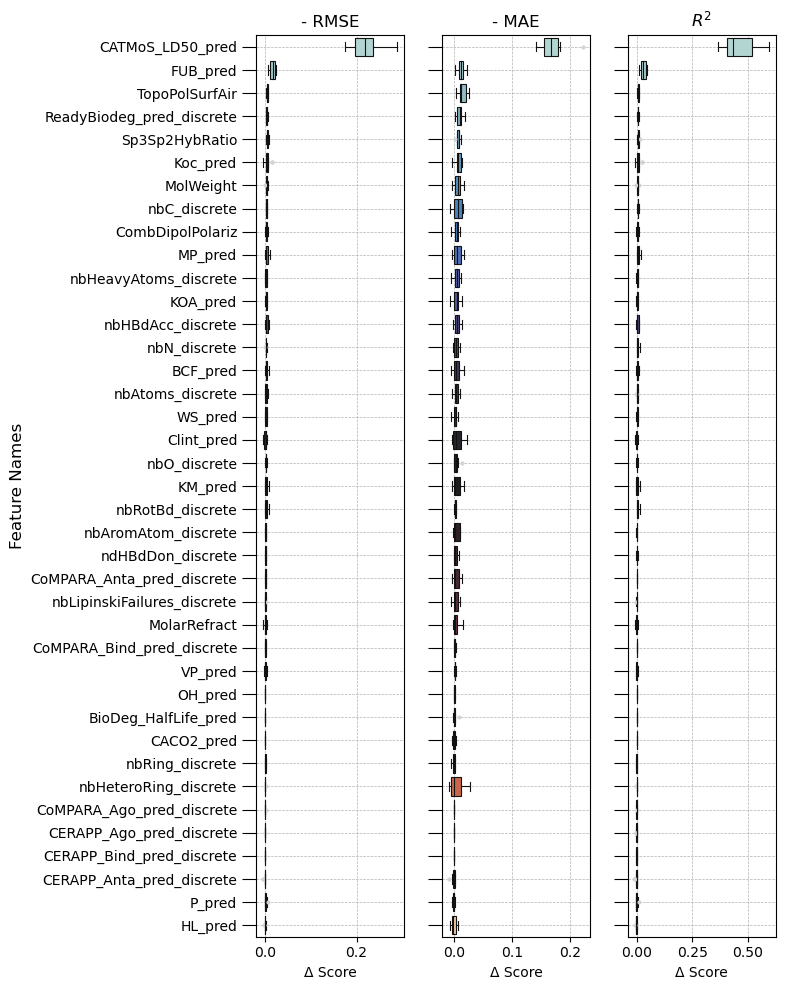

In [6]:
plot.importances_replicates_boxplots(results_analyzer, config.plot)

## Model performance

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:523: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs1.tight_layout(fig, rect=[0, 0, 0.7, 1])
C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:524: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0.7, 0, 1, 1], h_pad=0.5)


Saving figure --> "Figures\in_sample_performance_comparisons\opera-predicted-missing-RandomForestRegressor.png"
Saving figure --> "Figures\out_of_sample_prediction_scatterplots\opera-predicted-missing-RandomForestRegressor.png"


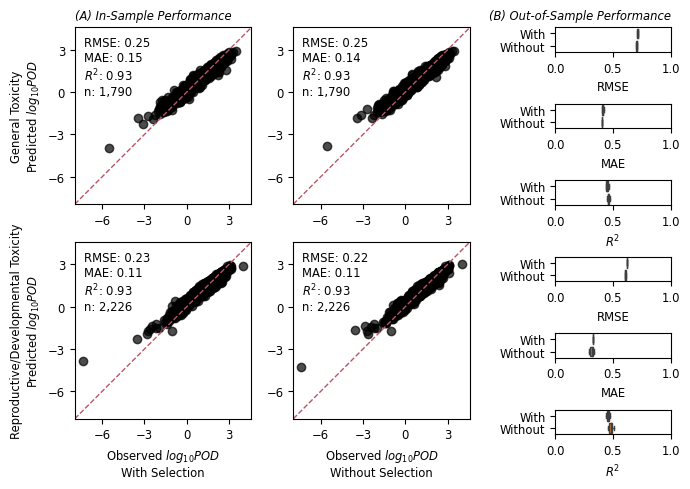

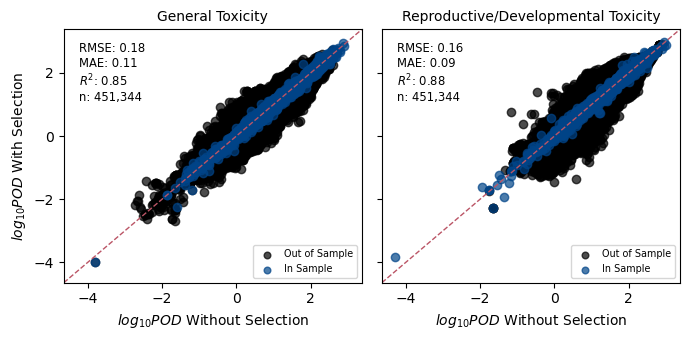

In [7]:
plot.in_and_out_sample_comparisons(results_analyzer, config.plot, metrics_manager.function_for_metric)

## Model performance: Benchmarking

"See if ToxCast or our QSAR is better at predicting regulatory PODs."

### Define the results to compare

1. `y_true`: Regulatory PODs 
2. `y_nicolo`: Surrogate PODs
3. `y_final_model`: Defined previously
4. `y_toxcast`: Oral equivalent dose for active Toxcast assays (thanks to En-Hsuan)

Use the intersection of chemicals across all four datasets for a fair comparison.

Saving figure --> "Figures\benchmarking_scatterplots\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-SVR.png"
Saving figure --> "Figures\benchmarking_scatterp

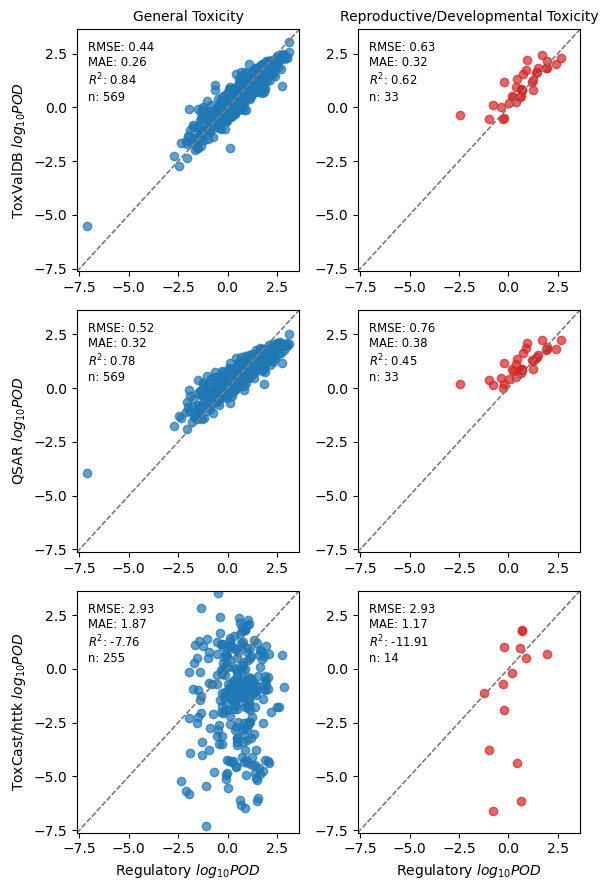

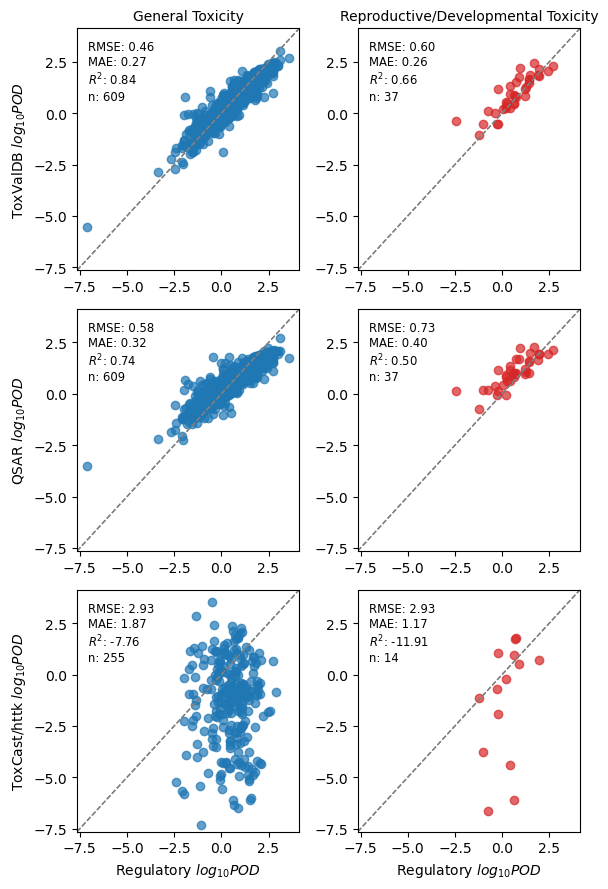

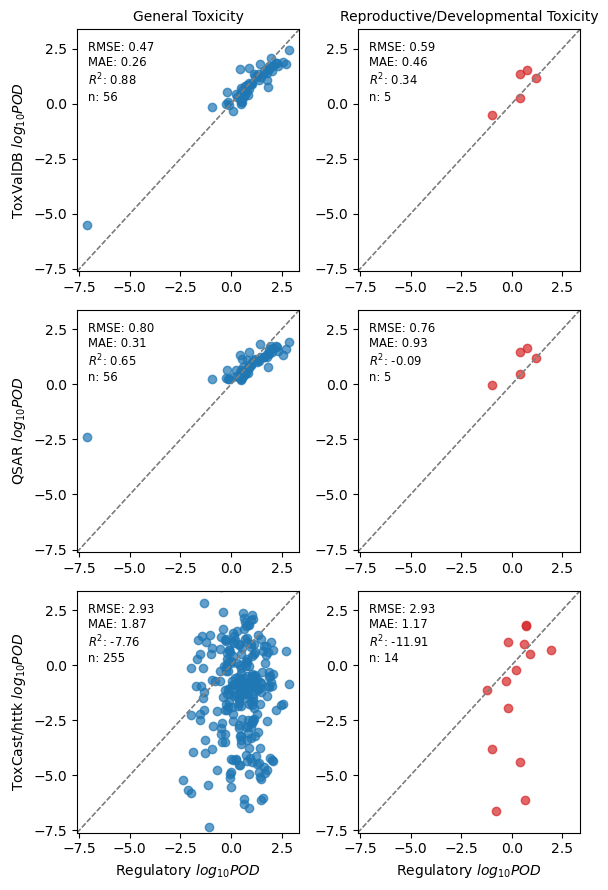

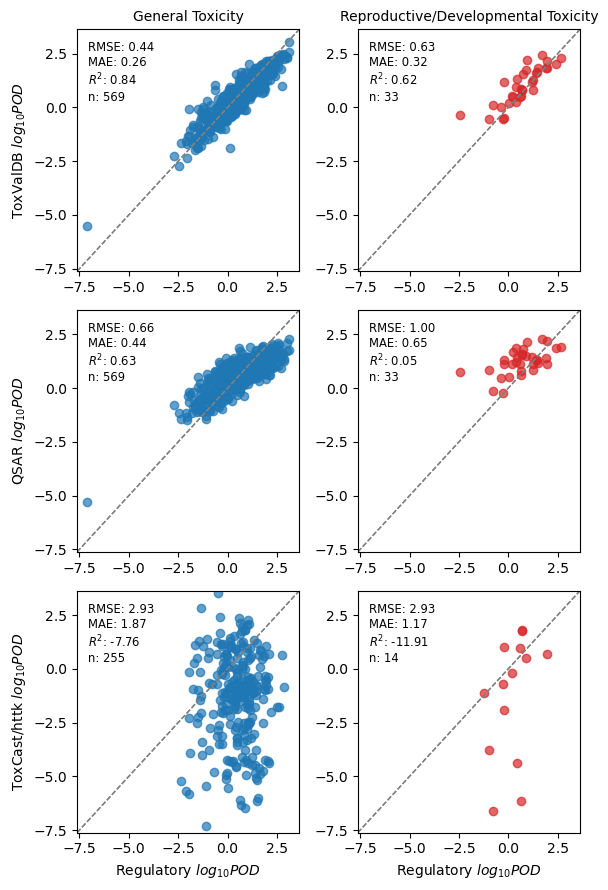

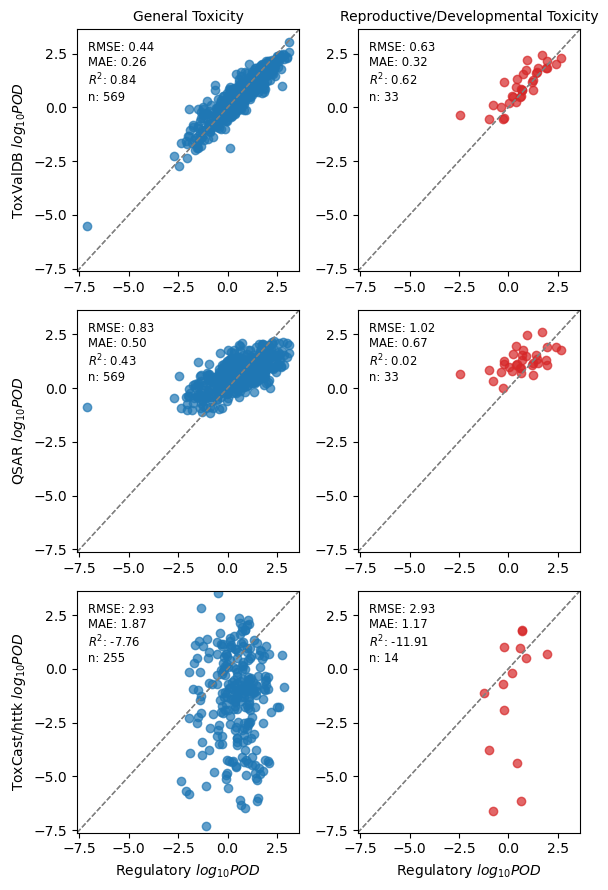

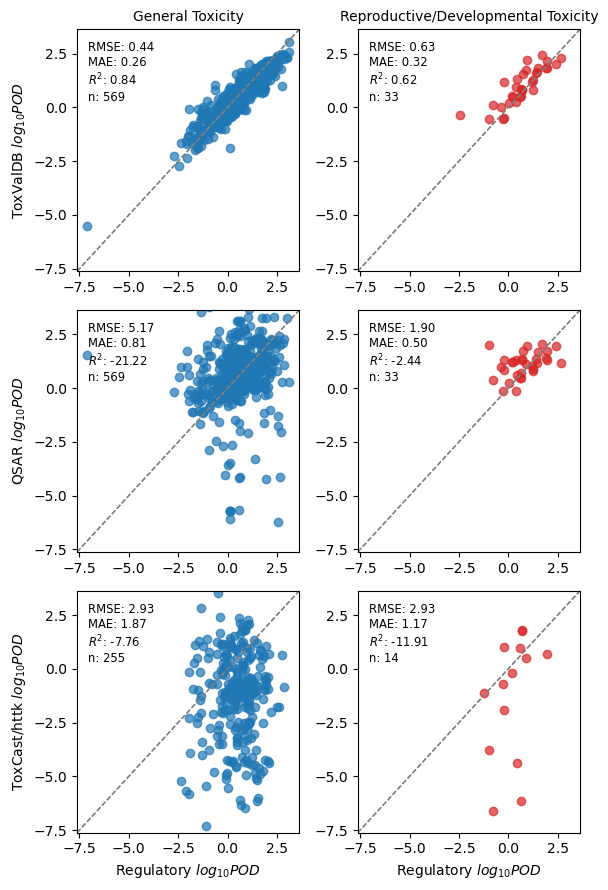

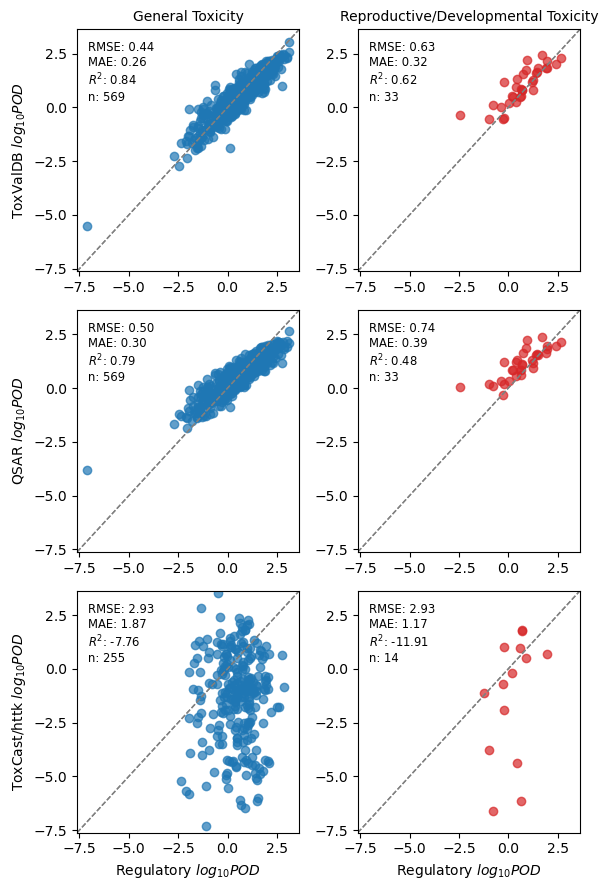

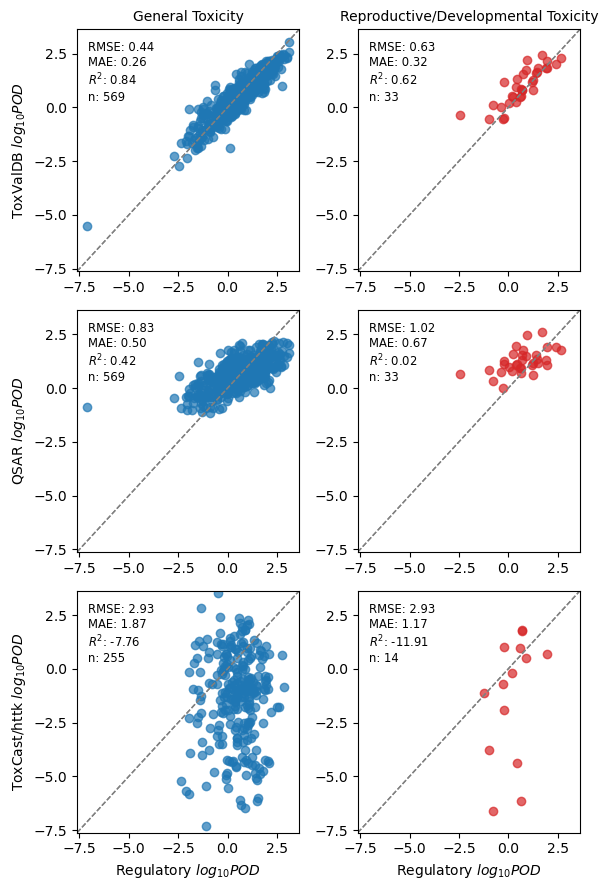

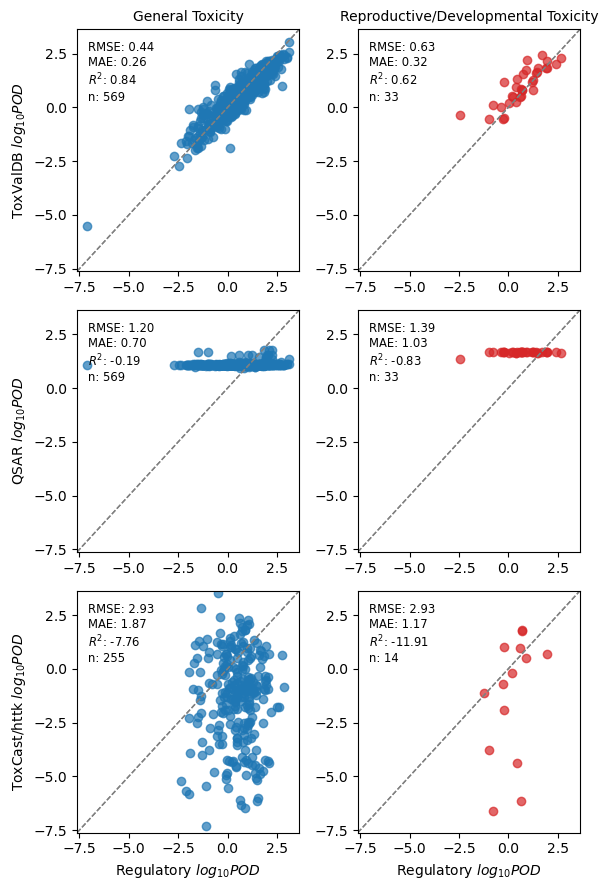

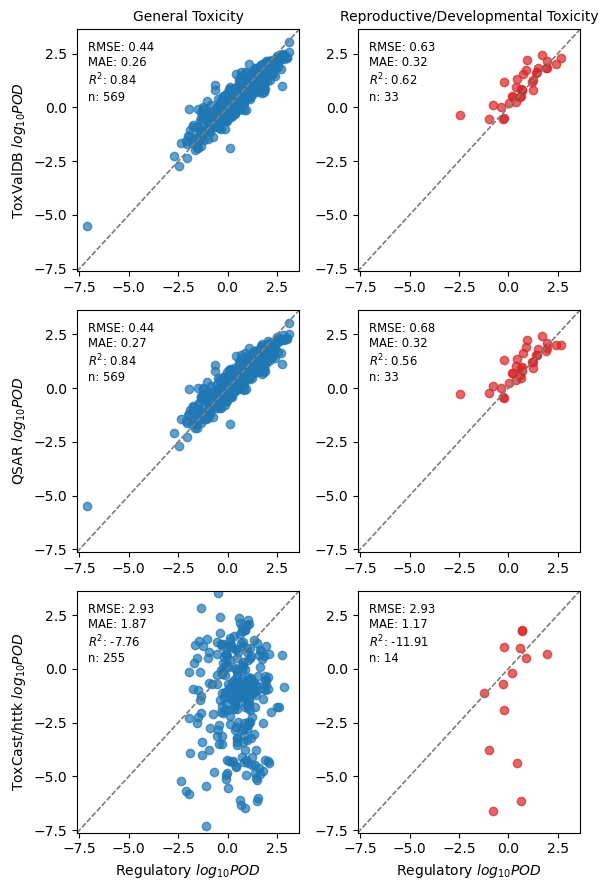

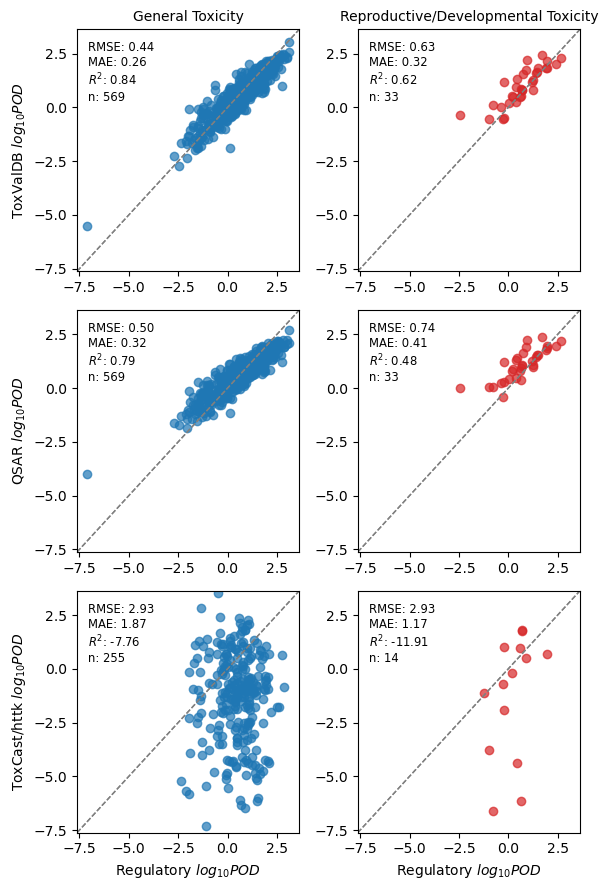

In [8]:
# TODO: Move to DataManager
y_regulatory_df = pd.read_csv(config.path.regulatory_pods_file, index_col=0)

y_toxcast = (
    pd.read_csv(config.path.toxcast_oeds_file, index_col=0)
    ['tox_httk_50']
)

plot.benchmarking_scatterplots(
    results_analyzer,
    y_regulatory_df,
    y_toxcast,
    metrics_manager.function_for_metric,
    config.plot
)

## SEEM3 exposure predictions

Saving figure --> "Figures\margins_of_exposure_cumulative\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-SVR.png"
Sav

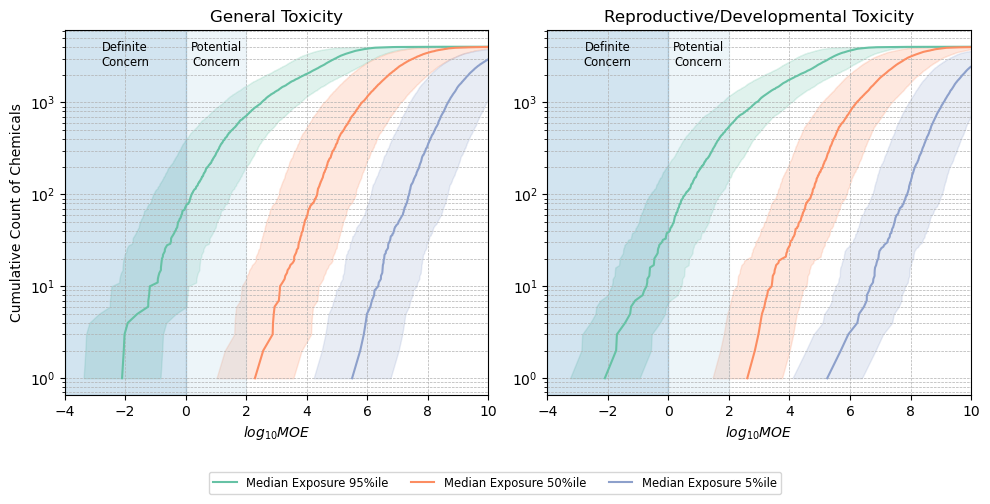

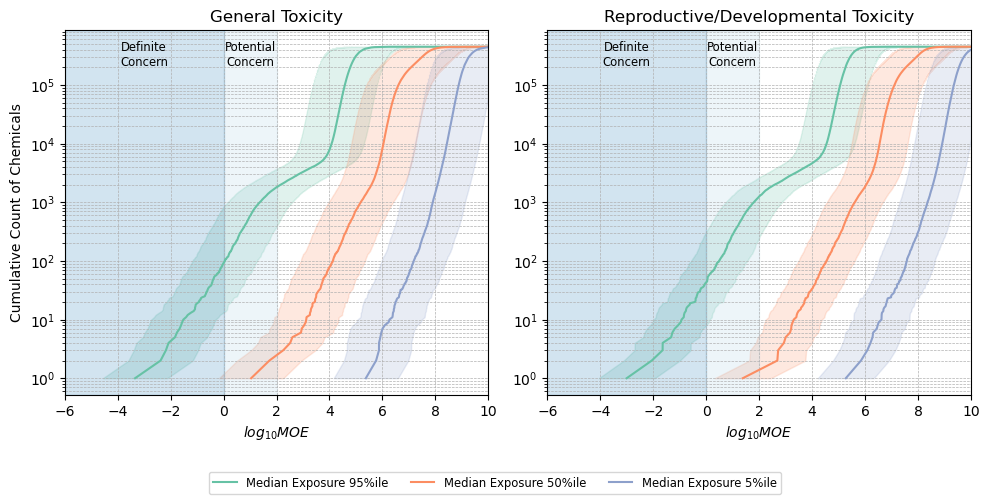

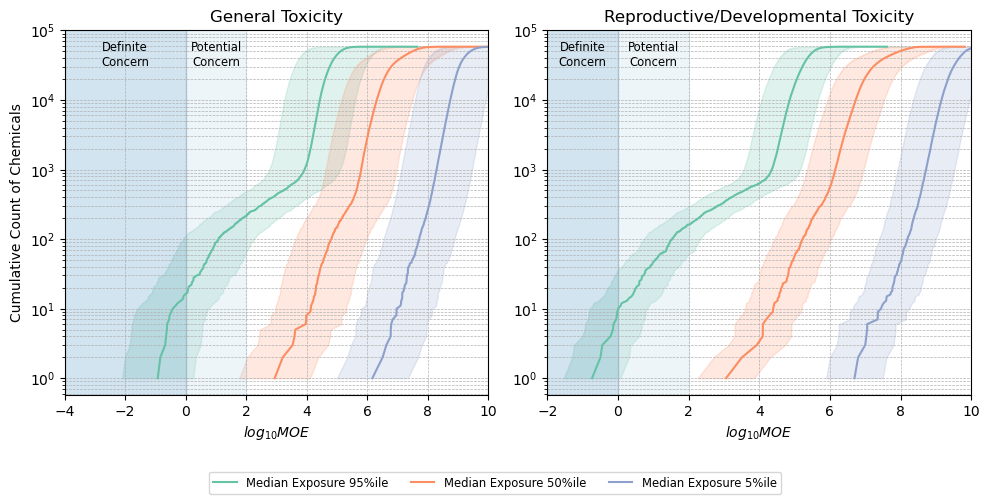

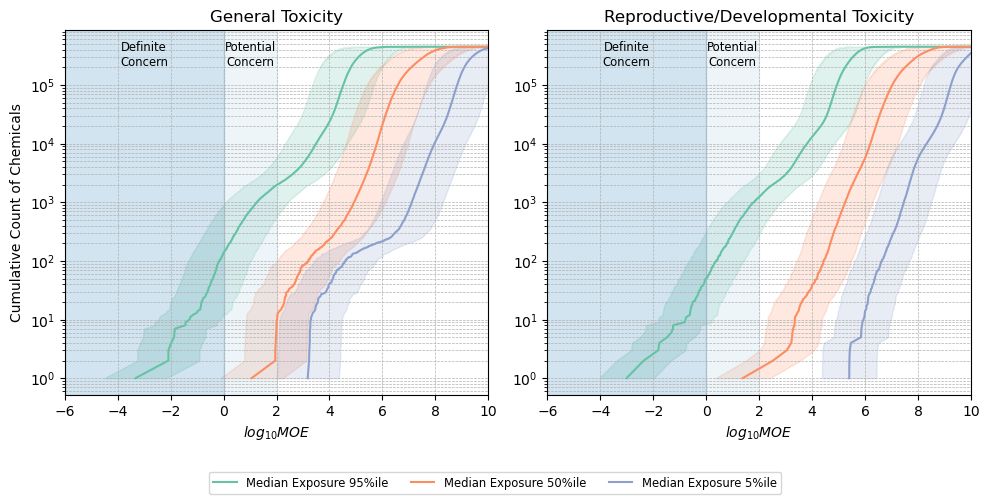

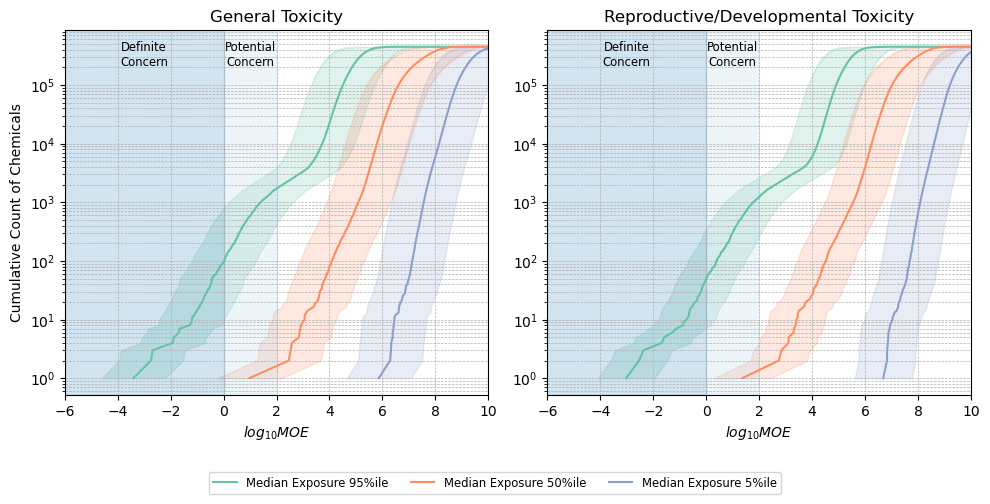

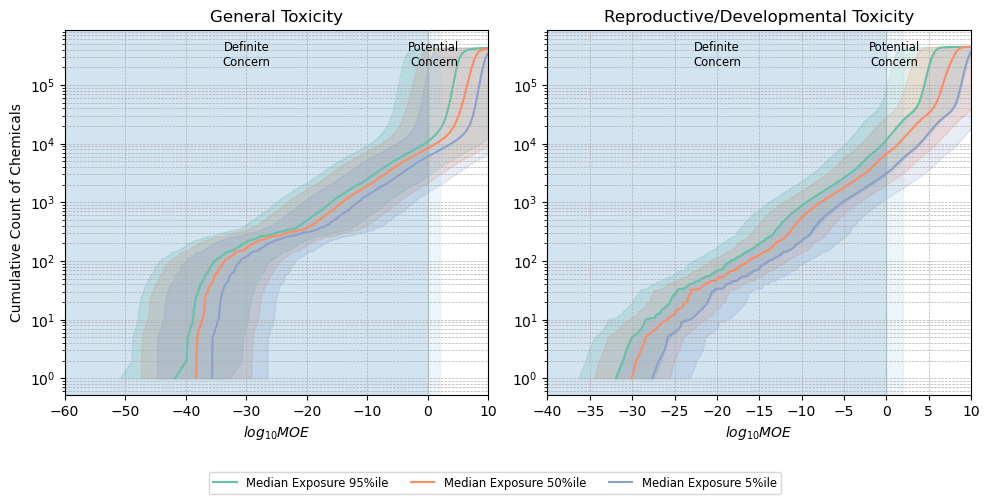

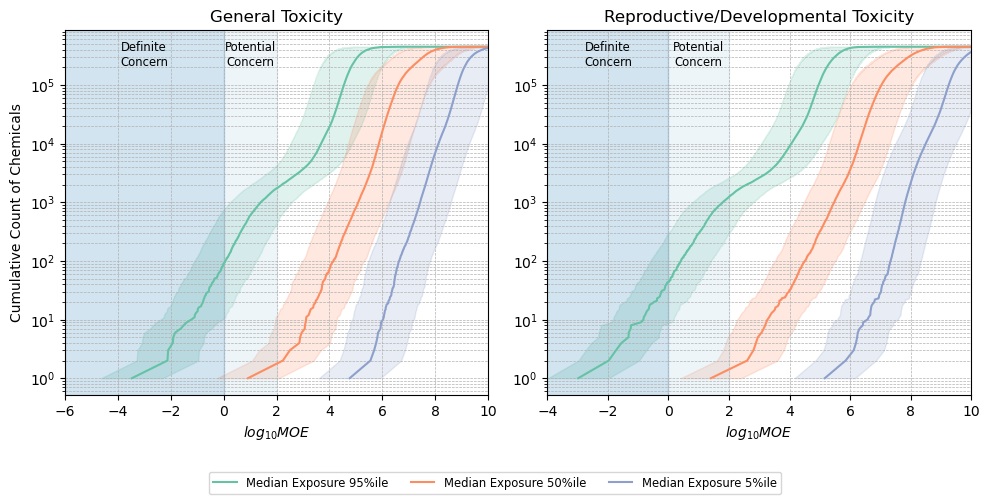

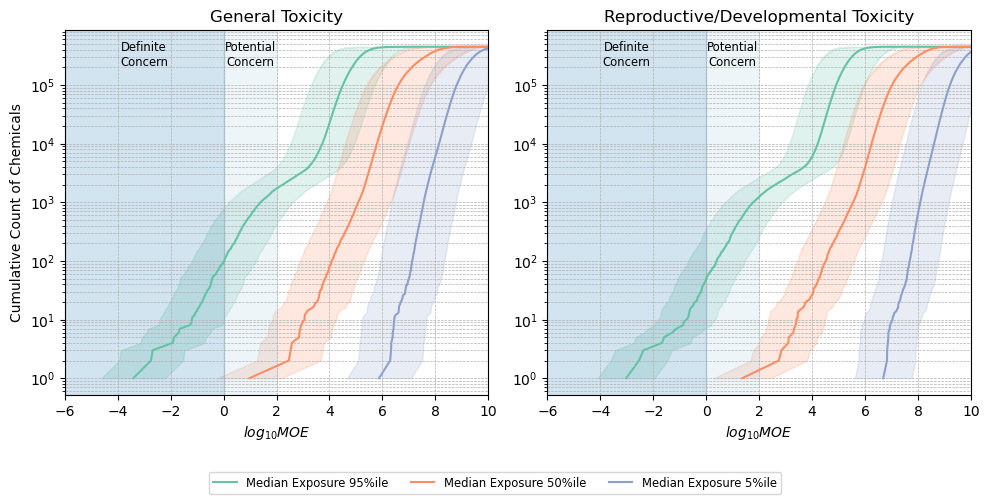

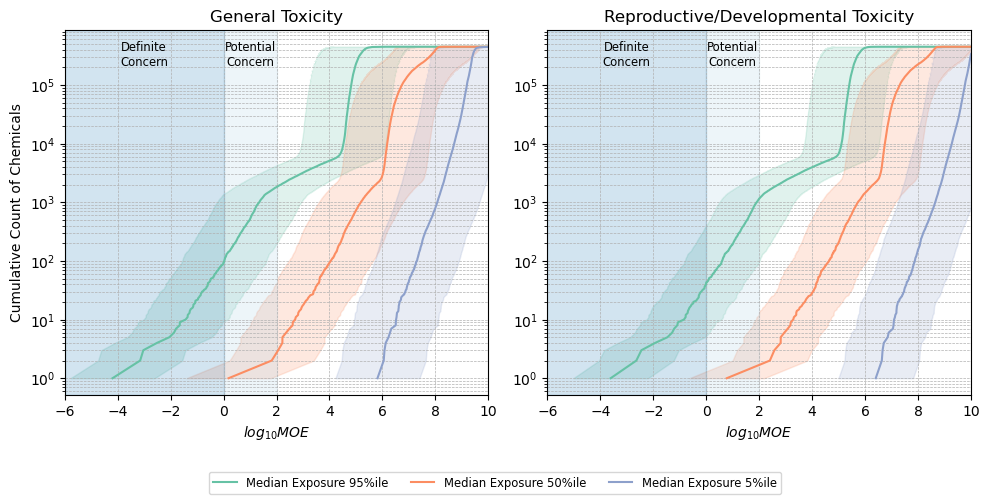

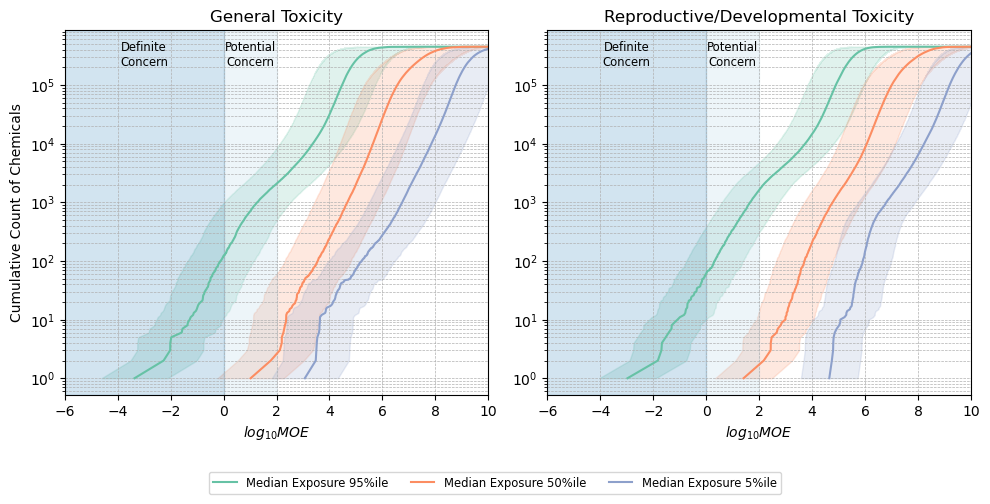

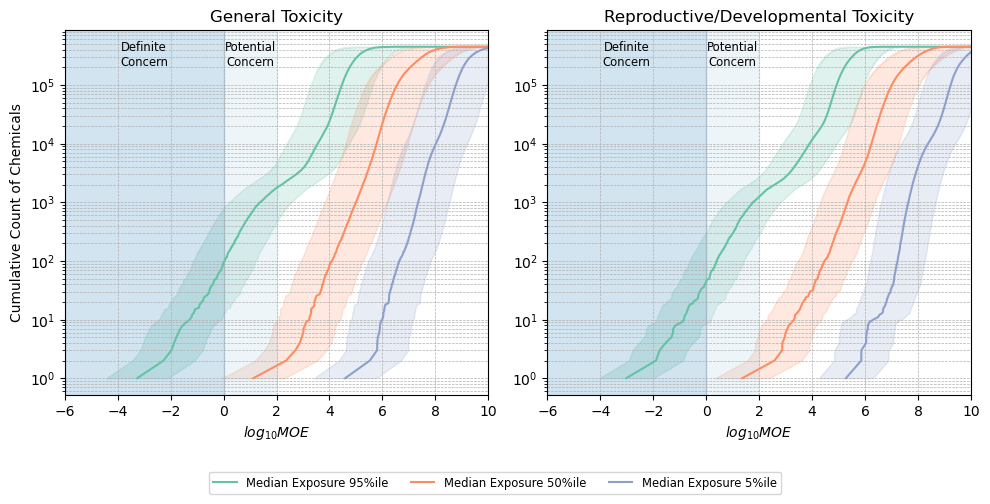

In [9]:
plot.margins_of_exposure_cumulative(
    results_analyzer, 
    config.plot,
    right_truncation=10.
)

## Next steps
- Expand model application to ~450,000 chemicals within SEEM3’s domain of applicability
- Sensitivity analysis ("one at a time")

In [10]:
plot.predictions_by_missing_feature(results_analyzer, config.plot)

Saving figure --> "Figures\predictions_by_missing_feature\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-SVR.png"


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000010B12030540> (for post_execute):


KeyboardInterrupt: 